In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pyzbar import pyzbar
from PIL import Image, ImageEnhance

def boxSize(arr):
    global data
    box_roll = np.rollaxis(arr,1,0)   # 轉置矩陣，把 x 放在同一欄，y 放在同一欄
    xmax = int(np.amax(box_roll[0]))  # 取出 x 最大值
    xmin = int(np.amin(box_roll[0]))  # 取出 x 最小值
    ymax = int(np.amax(box_roll[1]))  # 取出 y 最大值
    ymin = int(np.amin(box_roll[1]))  # 取出 y 最小值
    return (xmin,ymin,xmax,ymax)

def sharpen(img, sigma=300):    
    # sigma = 5、15、25
    blur_img = cv2.GaussianBlur(img, (0, 0), sigma)
    usm = cv2.addWeighted(img, 1.5, blur_img, -0.5, 0)
    
    #求出img 的最大最小值
    #Maximg = np.max(img)
    #Minimg = np.min(img)
    #输出最小灰度级和最大灰度级
    #Omin,Omax = 0,255
    #求 a, b
    #a = float(Omax - Omin)/(Maximg - Minimg)
    #b = Omin - a*Minimg
    #线性变换
    #O = a*img + b
    #usm = O.astype(np.uint8)

    return usm

def gama_transfer(img,power1):
    if len(img.shape) == 3:
         img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = 255*np.power(img/255,power1)
    img = np.around(img)
    img[img>255] = 255
    out_img = img.astype(np.uint8)
    return out_img

# 返回指定大小形狀的結構元素
# shape 的內容：cv2.MORPH_RECT ( 矩形 )、cv2.MORPH_CROSS ( 十字交叉 )、cv2.MORPH_ELLIPSE ( 橢圓形 )
# ksize 的格式：(x, y)

1944 2592


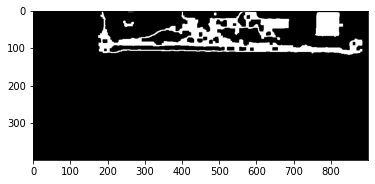

In [46]:
img = cv2.imread("YaoYuModule/ver1/YauYuModule_30.jpg")
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

#img = sharpen(img)

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img1 = cv2.threshold(img1, 70, 255, cv2.THRESH_BINARY)

img1 = cv2.GaussianBlur(img1, (5, 5), 2)
output1 = cv2.Canny(img1, 40, 250)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (11, 11))
output1 = cv2.morphologyEx(output1, cv2.MORPH_CLOSE, rect_kernel)
    
#ret, output1 = cv2.threshold(img1, 50, 255, cv2.THRESH_BINARY)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
output1 = cv2.dilate(output1, kernel2)  # 侵蝕
output1 = cv2.erode(output1, kernel1)   # 膨脹


#output1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 30)
#ret, output1 = cv2.threshold(img1, 50, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
height, width = output1.shape[:2]

#plt.imshow(img1)
plt.imshow(output1[700:1100, 800:1700], cmap='gray', vmin = 0, vmax = 255)
#plt.imshow(output1, cmap='gray', vmin = 0, vmax = 255)
#plt.imshow(output1[1250:1350, 1450:1550], cmap='gray', vmin = 0, vmax = 255)
print(height, width)
tmp = 1000
y1 = 0
y2 = tmp
x1 = 0
x2 = tmp

qrcode = cv2.QRCodeDetector()

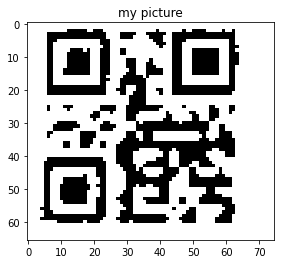

[Decoded(data=b'ZH-20210701-00002', type='QRCODE', rect=Rect(left=4, top=2, width=60, height=59), polygon=[Point(x=4, y=61), Point(x=62, y=61), Point(x=64, y=2), Point(x=6, y=2)], quality=1, orientation='UP')]


In [47]:
for i in range(2, 100):
    y1 = 0
    y2 = tmp
    for j in range(2, 100):
        crop_img = output1[int(y1):int(y2), int(x1):int(x2)]
        
        
        
        #crop_img = sharpen(crop_img)
        #ret, crop_img = cv2.threshold(crop_img, 50, 255, cv2.THRESH_BINARY)
        #crop_img = cv2.adaptiveThreshold(crop_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
        #ret, crop_img = cv2.threshold(crop_img, 0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
        #print("y1:", y1)
        #print("y2:", y2)
        #print("x1:", x1)
        #print("x2:", x2)
        
        
        contours, hierarchy = cv2.findContours(crop_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #print(contours)
        for cnt in contours:
            x,y,w,h = cv2.boundingRect(cnt)
            if w < 300 and w > 10:

                #cv2.rectangle(rgb_img[int(y1):int(y2), int(x1):int(x2)],(x,y),(x+w,y+h),(0,255,0),2)
                #cv2.drawContours(img[int(y1):int(y2), int(x1):int(x2)], [cnt], -1, (0,255,0), 2, cv2.LINE_AA)
                Qrcode_img = cv2.cvtColor(img[int(y1 + y):int(y1 + y+h), int(x1 + x):int(x1 + x+w)], cv2.COLOR_BGR2GRAY)
                #Qrcode_img = cv2.resize(Qrcode_img, (50, 50), interpolation=cv2.INTER_CUBIC)
                
    
                #Qrcode_img = sharpen(Qrcode_img)
                #Qrcode_img = gama_transfer(Qrcode_img, 0.3)
                #Qrcode_img = Image.fromarray(Qrcode_img)
                #sharpness = ImageEnhance.Sharpness(Qrcode_img)
                #Qrcode_img = sharpness.enhance(5)
                
                #Qrcode_img = np.asarray(Qrcode_img)
                #Qrcode_img = cv2.cvtColor(Qrcode_img, cv2.COLOR_BGR2GRAY)
                #ret, Qrcode_img = cv2.threshold(Qrcode_img, 10, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
                ret, Qrcode_img = cv2.threshold(Qrcode_img, 40, 255, cv2.THRESH_BINARY)
                #Qrcode_img = cv2.adaptiveThreshold(Qrcode_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 30)
                #print(type(Qrcode_img))
                
                #plt.imshow(Qrcode_img, cmap='gray', vmin = 0, vmax = 255)
                #plt.title('my picture')
                #plt.show()
                    
                
                #Qrcode_img = img[int(y1 + y):int(y1 + y+h), int(x1 + x):int(x1 + x+w)]
                #Qrcode_img = cv2.cvtColor(Qrcode_img, cv2.COLOR_BGR2GRAY)
                
                #ret, Qrcode_img = cv2.threshold(Qrcode_img, 100, 255, cv2.THRESH_BINARY)
                #ret, Qrcode_img = cv2.threshold(Qrcode_img, 100, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
                #Qrcode_img = cv2.adaptiveThreshold(Qrcode_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 1)
                
                output = pyzbar.decode(Qrcode_img)
                if(len(output) != 0):
                    plt.imshow(Qrcode_img, cmap='gray', vmin = 0, vmax = 255)
                    plt.title('my picture')
                    plt.show()
                    print(output)
                '''
                data, bbox, rectified = qrcode.detectAndDecode(Qrcode_img)  # 偵測圖片中的 QRCode
                
                
                if bbox is not None:
                    print(x,y,w,h)
                    print(bbox)
                    print(type(rectified))
                    #cv2.rectangle(rgb_img[int(y1):int(y2), int(x1):int(x2)],(box[0],box[1]),(box[2],box[3]),(255,0,0),2)
                    plt.imshow(Qrcode_img, cmap='gray', vmin = 0, vmax = 255)
                    plt.title('my picture')
                    plt.show()
                '''
                
                
        #cv2.drawContours(rgb_img[int(y1):int(y2), int(x1):int(x2)], contours, -1,(0,0,255), 1)
        
        #plt.imshow(rgb_img[int(y1):int(y2), int(x1):int(x2)])
        #plt.title('my picture')
        #plt.show()
        '''
        data, bbox, rectified = qrcode.detectAndDecode(crop_img)  # 偵測圖片中的 QRCode
        if bbox is not None:
            #print(data)
            #print(bbox)
            #print(rectified)
            box = boxSize(bbox[0])
            cv2.rectangle(rgb_img[int(y1):int(y2), int(x1):int(x2)],(box[0],box[1]),(box[2],box[3]),(255,0,0),2)  # 畫矩形
            plt.imshow(rgb_img[int(y1):int(y2), int(x1):int(x2)])
            plt.title('my picture')
            plt.show()
        '''
        y1 = y2 + 1
        y2 = tmp * j
        if(y1 >= height):
            break
        
    x1 = x2 + 1
    x2 = tmp * i
    if(x1 >= width):
            break


# 超解析度還原

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
print(tf.__version__)

2.11.0


In [3]:
model = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")
concrete_func = model.signatures[tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]

@tf.function(input_signature=[tf.TensorSpec(shape=[1, 42, 42, 3], dtype=tf.float32)])
def f(input):
    return concrete_func(input);

converter = tf.lite.TFLiteConverter.from_concrete_functions([f.get_concrete_function()], model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('ESRGAN.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\user2\AppData\Local\Temp\tmpik_mycqu\assets


INFO:tensorflow:Assets written to: C:\Users\user2\AppData\Local\Temp\tmpik_mycqu\assets


In [4]:
#test_img_path = tf.keras.utils.get_file('lr.jpg', 'https://raw.githubusercontent.com/tensorflow/examples/master/lite/examples/super_resolution/android/app/src/main/assets/lr-1.jpg')
test_img_path = 'test_100.jpg'
esrgan_model_path = './ESRGAN.tflite'

In [5]:
lr = tf.io.read_file(test_img_path)
lr = tf.image.decode_jpeg(lr)
lr = tf.expand_dims(lr, axis=0)
lr = tf.cast(lr, tf.float32)

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=esrgan_model_path)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Run the model
interpreter.set_tensor(input_details[0]['index'], lr)
interpreter.invoke()

# Extract the output and postprocess it
output_data = interpreter.get_tensor(output_details[0]['index'])
sr = tf.squeeze(output_data, axis=0)
sr = tf.clip_by_value(sr, 0, 255)
sr = tf.round(sr)
sr = tf.cast(sr, tf.uint8)

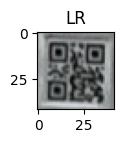

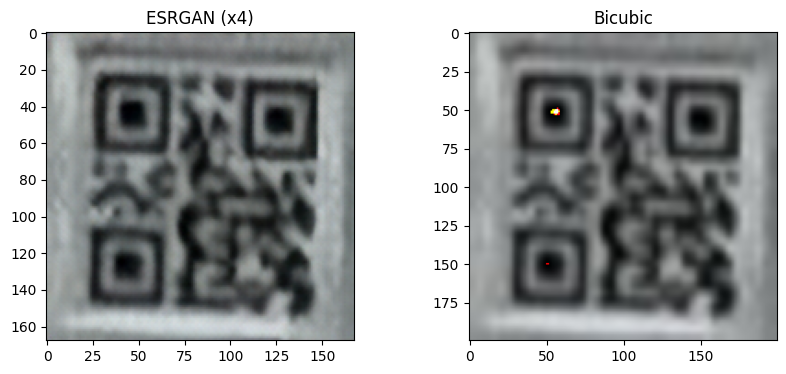

In [6]:
lr = tf.cast(tf.squeeze(lr, axis=0), tf.uint8)
plt.figure(figsize = (1, 1))
plt.title('LR')
plt.imshow(lr.numpy());

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)        
plt.title(f'ESRGAN (x4)')
plt.imshow(sr.numpy());

bicubic = tf.image.resize(lr, [200, 200], tf.image.ResizeMethod.BICUBIC)
bicubic = tf.cast(bicubic, tf.uint8)
plt.subplot(1, 2, 2)   
plt.title('Bicubic')
plt.imshow(bicubic.numpy());



[]


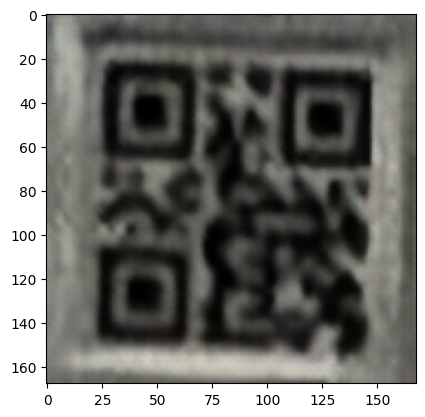

In [7]:
img_x4 = sr.numpy()
img_x4 = gama_transfer(img_x4, 1.5)
plt.imshow(img_x4);

output = pyzbar.decode(img_x4)
print(output)